# Non-Linear Regression in Julia

In [14]:
using Pkg
Pkg.add("Optim")

  Updating registry at `C:\Users\masahiro\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %                                      ]  2.6 %.1 %Fetching: [=====>                                   ]  11.0 %Fetching: [========>                                ]  17.8 %========>                                ]  19.5 %21.9 %5 %                            ]  29.2 %Fetching: [=============>                           ]  31.2 %===============>                         ]  35.1 %38.7 %40.6 % [==================>                      ]  42.6 % [===================>                     ]  47.4 %Fetching: [=====================>                   ]  50.9 %Fetching: [======================>                  ]  54.0 %                 ]  57.2 %Fetching: [=========================>               ]  60.1 %Fetching: [==========================>              ]  64.4 %>             ]  66.5 %========

In [2]:
using Distributions, StatsPlots, Random, Optim, Plots
gr()

Plots.GRBackend()

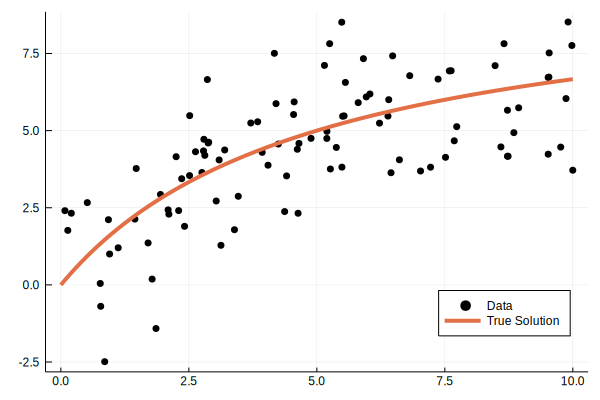

In [3]:
# Make some Data
Random.seed!(1)
N = 100
x = rand(Uniform(0,10),N)
f(x,b1=10,b2=5) = b1 * (x/(b2 + x))
y = f.(x) + rand(Normal(0,1.5),N)

scatter(x,y,label="Data",color=:black,legend=:bottomright)
xvec = 0:0.1:10
plot!(xvec,f.(xvec),label="True Solution",linewidth=4)

In [4]:
g(b) = f.(x,b[1],b[2])

g (generic function with 1 method)

In [5]:
g([1,2])

100-element Array{Float64,1}:
 0.5413194839575125 
 0.634046159943062  
 0.6099136302963125 
 0.03804199245736917
 0.7095610315931671 
 0.5133443440403995 
 0.8263762800443298 
 0.833320090461538  
 0.5571911762516487 
 0.8314606315820053 
 0.7353626037006202 
 0.6860814681804196 
 0.6798554742088987 
 ⋮                  
 0.6944557955815391 
 0.6775683536430208 
 0.5295789479241747 
 0.5886205370196708 
 0.6071837922235668 
 0.46002981588585834
 0.4238999207545853 
 0.5349516579724214 
 0.3172412581212436 
 0.7730920520672114 
 0.7921595220764402 
 0.6289984000308471 

### Using OLS

In [6]:
ols(b) = sum( (y - g(b)).^2 )

ols (generic function with 1 method)

In [7]:
ols([1,2])

1801.4170409648357

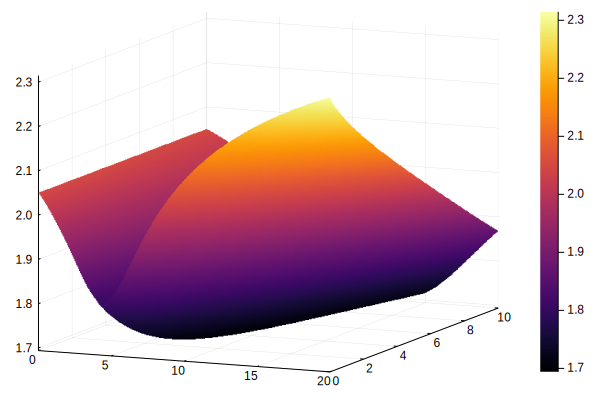

In [11]:
# Plot of the error map
beta1_vec = 0:0.1:20
beta2_vec = 0:0.1:10
error_map = zeros(length(beta1_vec),length(beta2_vec))
for i in 1:length(beta1_vec), j in 1:length(beta2_vec)
    error_map[i,j] = log.(log.(ols([beta1_vec[i]  beta2_vec[j]])))
end
# heatmap(beta1_vec,beta2_vec,error_map')
surface(beta1_vec,beta2_vec,error_map')

In [16]:
out_OLS = optimize(ols,[5.0,1.0], Newton())

 * Status: success

 * Candidate solution
    Minimizer: [9.04e+00, 4.29e+00]
    Minimum:   2.306575e+02

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [5.00e+00, 1.00e+00]

 * Convergence measures
    |x - x'|               = 6.02e-06 ≰ 0.0e+00
    |x - x'|/|x'|          = 6.66e-07 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.35e-11 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.75e-13 ≰ 0.0e+00
    |g(x)|                 = 1.09e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    6
    f(x) calls:    18
    ∇f(x) calls:   18
    ∇²f(x) calls:  6


In [27]:
b0_ols = out_OLS.minimizer

2-element Array{Float64,1}:
 9.03877209401608 
 4.287131822798944

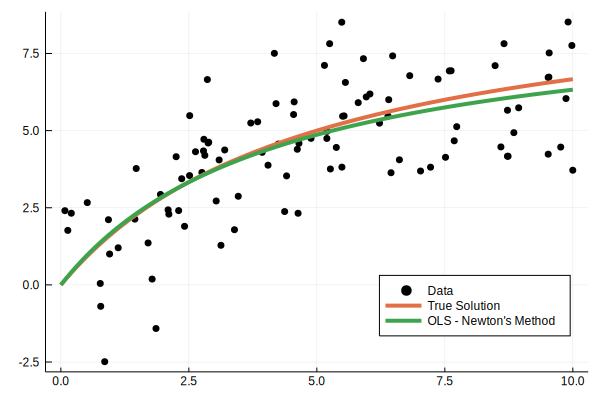

In [28]:
scatter(x,y,label="Data",color=:black,legend=:bottomright)
xvec = 0:0.1:10
plot!(xvec,f.(xvec),label="True Solution",linewidth=4)
plot!(xvec,f.(xvec,b0_ols[1],b0_ols[2]), label="OLS - Newton's Method", linewidth=4)

### Using MLE

In [1]:
mle(b) = sum(logpdf.(Normal(0,1.5), y - g(b)))

mle (generic function with 1 method)

In [32]:
# mle(b) = sum( (-1/2) * log(2*pi*1.5^2) .+ (((y - g(b))/(2*1.5)).^2) )

mle (generic function with 1 method)

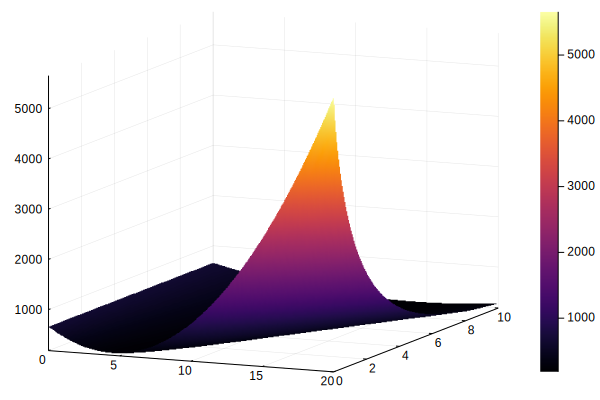

In [5]:
# Plot of the error map
beta1_vec = 0:0.1:20
beta2_vec = 0:0.1:10
error_map = zeros(length(beta1_vec),length(beta2_vec))
for i in 1:length(beta1_vec), j in 1:length(beta2_vec)
#     error_map[i,j] = exp.(-mle([beta1_vec[i]  beta2_vec[j]]))
    error_map[i,j] = (-mle([beta1_vec[i]  beta2_vec[j]]))
end
# heatmap(beta1_vec,beta2_vec,error_map')
surface(beta1_vec,beta2_vec,error_map')

In [45]:
mle([10,5])

-106.46207527516248

In [48]:
out_MLE = optimize(mle,[1.0,2.0], Newton())

 * Status: success

 * Candidate solution
    Minimizer: [9.04e+00, 4.29e+00]
    Minimum:   -1.068118e+02

 * Found with
    Algorithm:     Newton's Method
    Initial Point: [1.00e+00, 2.00e+00]

 * Convergence measures
    |x - x'|               = 9.24e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.02e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.09e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    8
    f(x) calls:    25
    ∇f(x) calls:   25
    ∇²f(x) calls:  8


In [49]:
b0_mle = out_MLE.minimizer

2-element Array{Float64,1}:
 9.038772093796801
 4.287131822766921

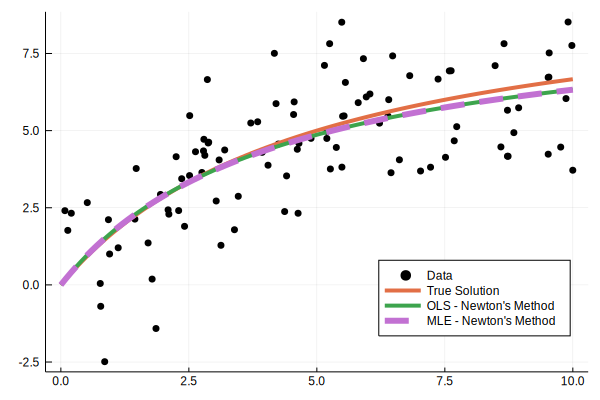

In [50]:
scatter(x,y,label="Data",color=:black,legend=:bottomright)
xvec = 0:0.1:10
plot!(xvec,f.(xvec),label="True Solution",linewidth=4)
plot!(xvec,f.(xvec,b0_ols[1],b0_ols[2]), label="OLS - Newton's Method", linewidth=4)
plot!(xvec,f.(xvec,b0_mle[1],b0_mle[2]), label="MLE - Newton's Method", linestyle=:dash, linewidth=6)

### One More Non-linear Model

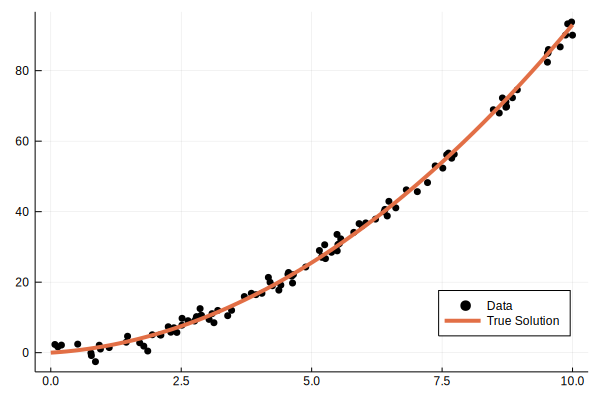

In [51]:
# Make some Data
Random.seed!(1)
N = 100
x = rand(Uniform(0,10),N)
f(x,b1=10,b2=5) = sin(2*b1) * x - cos(2*b2) * x^2
y = f.(x) + rand(Normal(0,1.5),N)

scatter(x,y,label="Data",color=:black,legend=:bottomright)
xvec = 0:0.1:10
plot!(xvec,f.(xvec),label="True Solution",linewidth=4)

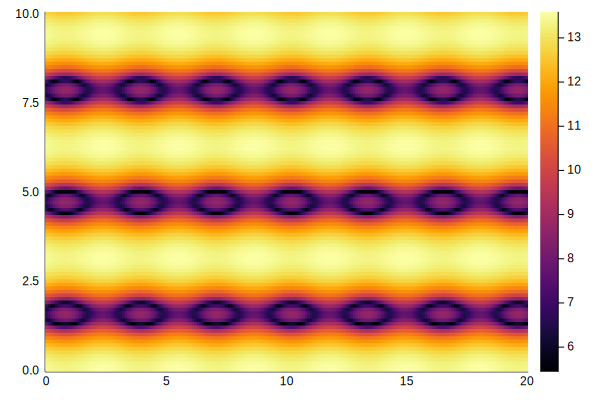

In [52]:
# Plot of the error map
beta1_vec = 0:0.1:20
beta2_vec = 0:0.1:10
error_map = zeros(length(beta1_vec),length(beta2_vec))
for i in 1:length(beta1_vec), j in 1:length(beta2_vec)
    error_map[i,j] = log.(ols([beta1_vec[i]  beta2_vec[j]]))
end
heatmap(beta1_vec,beta2_vec,error_map')

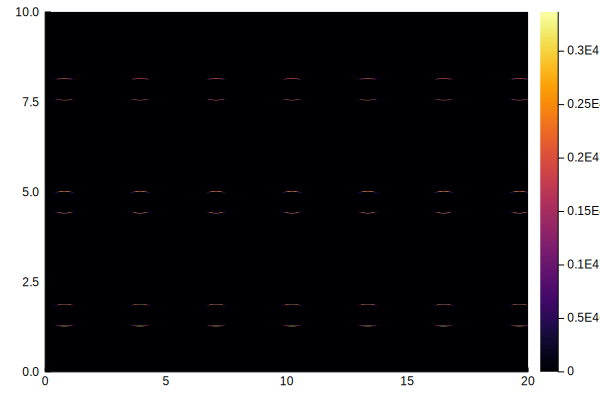

In [53]:
# Plot of the error map
beta1_vec = 0:0.01:20
beta2_vec = 0:0.01:10
error_map = zeros(length(beta1_vec),length(beta2_vec))
for i in 1:length(beta1_vec), j in 1:length(beta2_vec)
    error_map[i,j] = exp(-mle([beta1_vec[i]  beta2_vec[j]]))
end
heatmap(beta1_vec,beta2_vec,error_map')

In [61]:
out_OLS = optimize(ols,[22.0,2.0], Newton())
out_MLE = optimize(mle, [22.0,2.0])

 * Status: success

 * Candidate solution
    Minimizer: [2.58e+01, 1.87e+00]
    Minimum:   -1.071339e+02

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [2.20e+01, 2.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    54
    f(x) calls:    114


In [59]:
b0_ols = out_OLS.minimizer
b0_mle = out_MLE.minimizer

2-element Array{Float64,1}:
 22.878788558627    
  1.8705243017367015

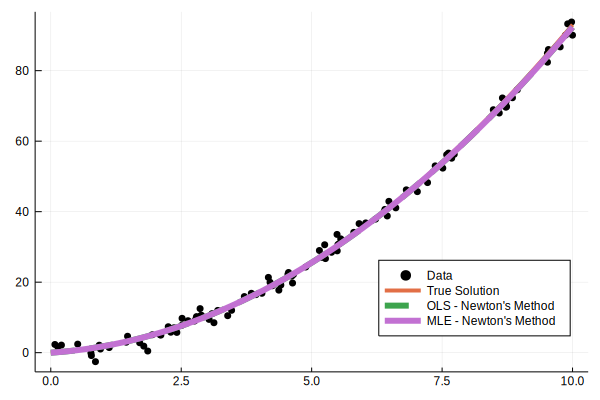

In [62]:
scatter(x,y,label="Data",color=:black,legend=:bottomright)
xvec = 0:0.1:10
plot!(xvec,f.(xvec),label="True Solution",linewidth=4)
plot!(xvec,f.(xvec,b0_ols[1],b0_ols[2]), label="OLS - Newton's Method", linewidth=6, linestyle=:dash)
plot!(xvec,f.(xvec,b0_mle[1],b0_mle[2]), label="MLE - Newton's Method", linewidth=6)

### Something Other Than Newton's Method

In [63]:
out = optimize(ols,[1.0,2.0])

 * Status: success

 * Candidate solution
    Minimizer: [8.88e-01, 1.87e+00]
    Minimum:   2.277581e+02

 * Found with
    Algorithm:     Nelder-Mead
    Initial Point: [1.00e+00, 2.00e+00]

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    46
    f(x) calls:    94
